In [1]:
# EDA Template for Wind Turbine SCADA Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# 1. Load Data
df = pd.read_csv("dataset/T1.csv", parse_dates=["Date/Time"])

In [ ]:
# 2. Basic Info
print(df.info())
print(df.describe().T)
print("Missing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB
None
                                 count         mean          std       min  \
LV ActivePower (kW)            50530.0  1307.684332  1312.459242 -2.471405   
Wind Speed (m/s)               50530.0     7.557952     4.227166  0.000000   
Theoretical_Power_Curve (KWh)  50530.0  1492.175463  1368.018238  0.000000   
Wind Direction (°)             50530.0   123.687559    93.443736  0.000000   

                        

In [8]:
# 3. Time Range and Frequency
# Convert 'Date/Time' column to datetime with dayfirst=True
df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True)

print("Data time range:", df['Date/Time'].min(), "→", df['Date/Time'].max())
df['time_diff'] = df['Date/Time'].diff().dt.total_seconds().div(60)
print("Average sampling interval (minutes):", df['time_diff'].mean())

Data time range: 2018-01-01 00:00:00 → 2018-12-31 23:50:00
Average sampling interval (minutes): 10.401749490391657


In [9]:
# 4. Check duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


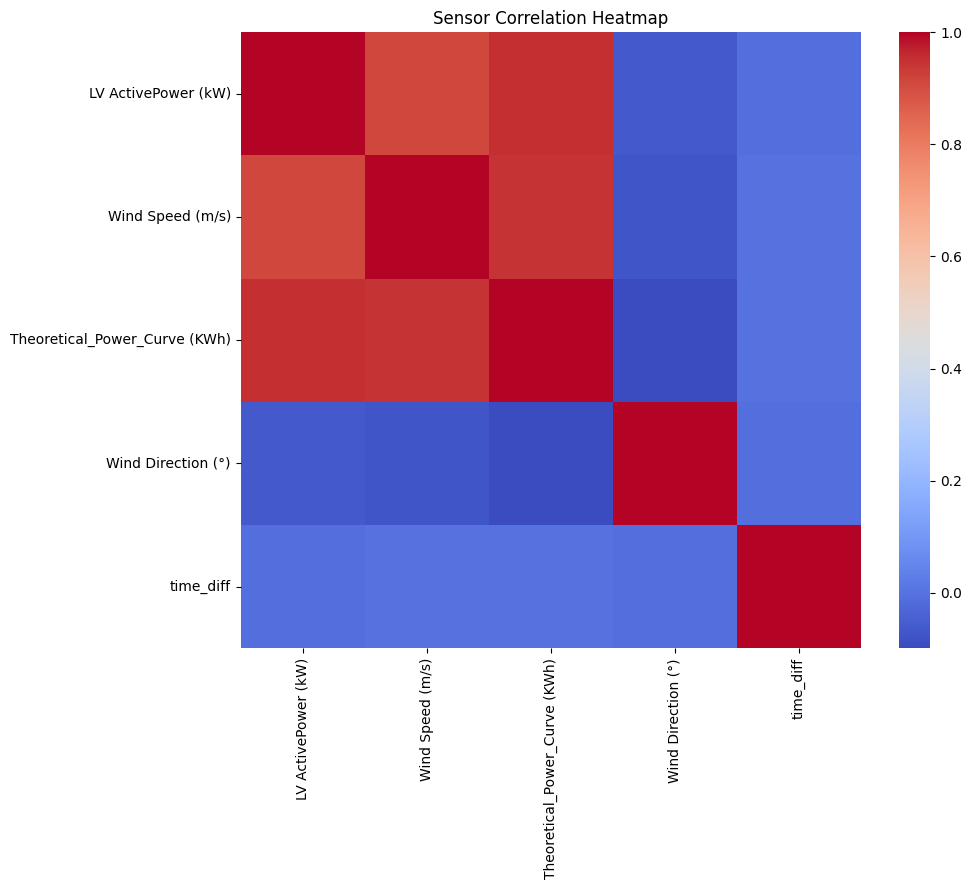

In [ ]:
# 5. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Sensor Correlation Heatmap")
plt.show()

In [ ]:
print(df.columns.tolist())

['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)', 'time_diff']


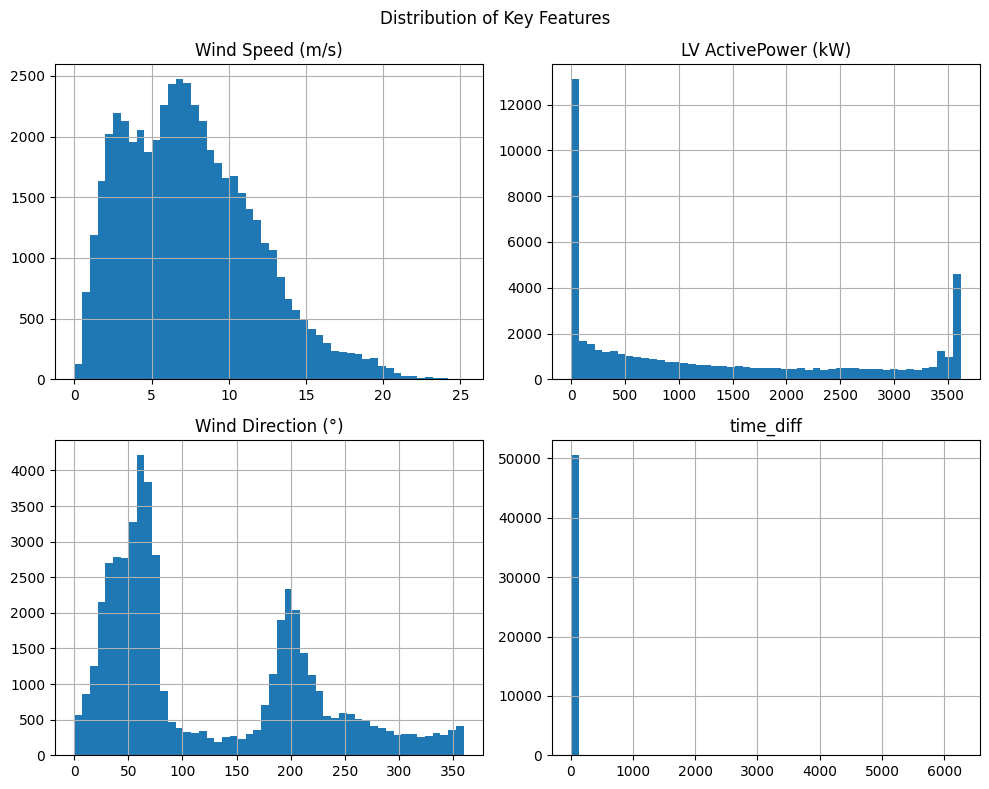

In [13]:
# 6. Distribution of Key Variables
cols = ['Wind Speed (m/s)', 'LV ActivePower (kW)', 'Wind Direction (°)', 'time_diff']
df[cols].hist(bins=50, figsize=(10,8))
plt.suptitle("Distribution of Key Features")
plt.tight_layout()
plt.show()

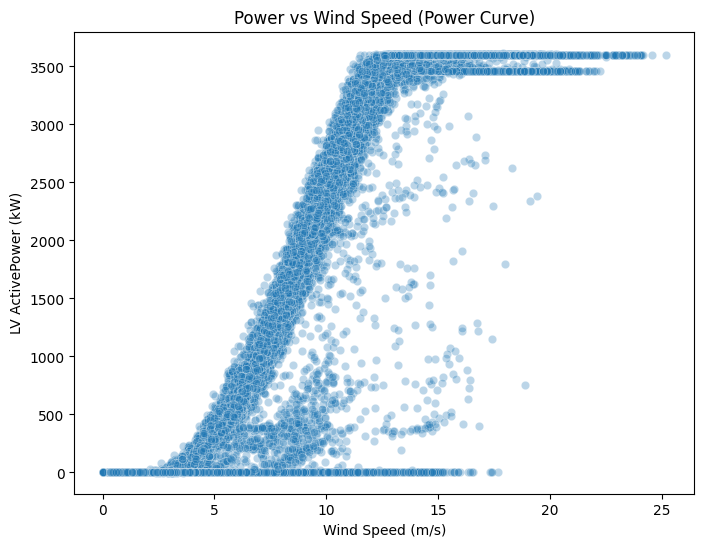

In [15]:
# 7. Power Curve
plt.figure(figsize=(8,6))
sns.scatterplot(x='Wind Speed (m/s)', y='LV ActivePower (kW)', data=df, alpha=0.3)
plt.title("Power vs Wind Speed (Power Curve)")
plt.show()

In [16]:
# 8. Outlier Detection (Z-Score)
z_scores = np.abs(stats.zscore(df.select_dtypes(np.number)))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers per variable:\n", outliers)

Outliers per variable:
 LV ActivePower (kW)                0
Wind Speed (m/s)                 228
Theoretical_Power_Curve (KWh)      0
Wind Direction (°)                 0
time_diff                          0
dtype: int64


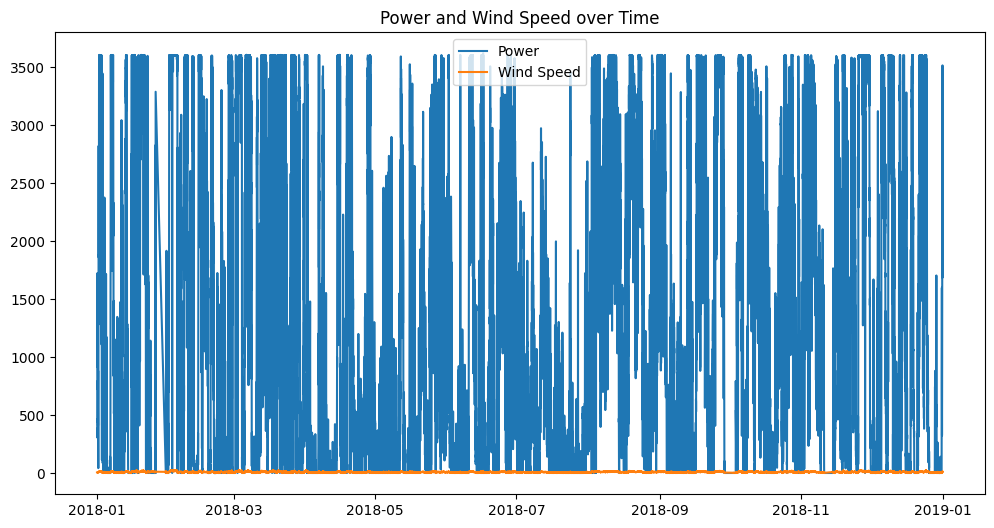

In [18]:
# 9. Time Series Plot
plt.figure(figsize=(12,6))
plt.plot(df['Date/Time'], df['LV ActivePower (kW)'], label='Power')
plt.plot(df['Date/Time'], df['Wind Speed (m/s)'], label='Wind Speed')
plt.legend()
plt.title("Power and Wind Speed over Time")
plt.show()

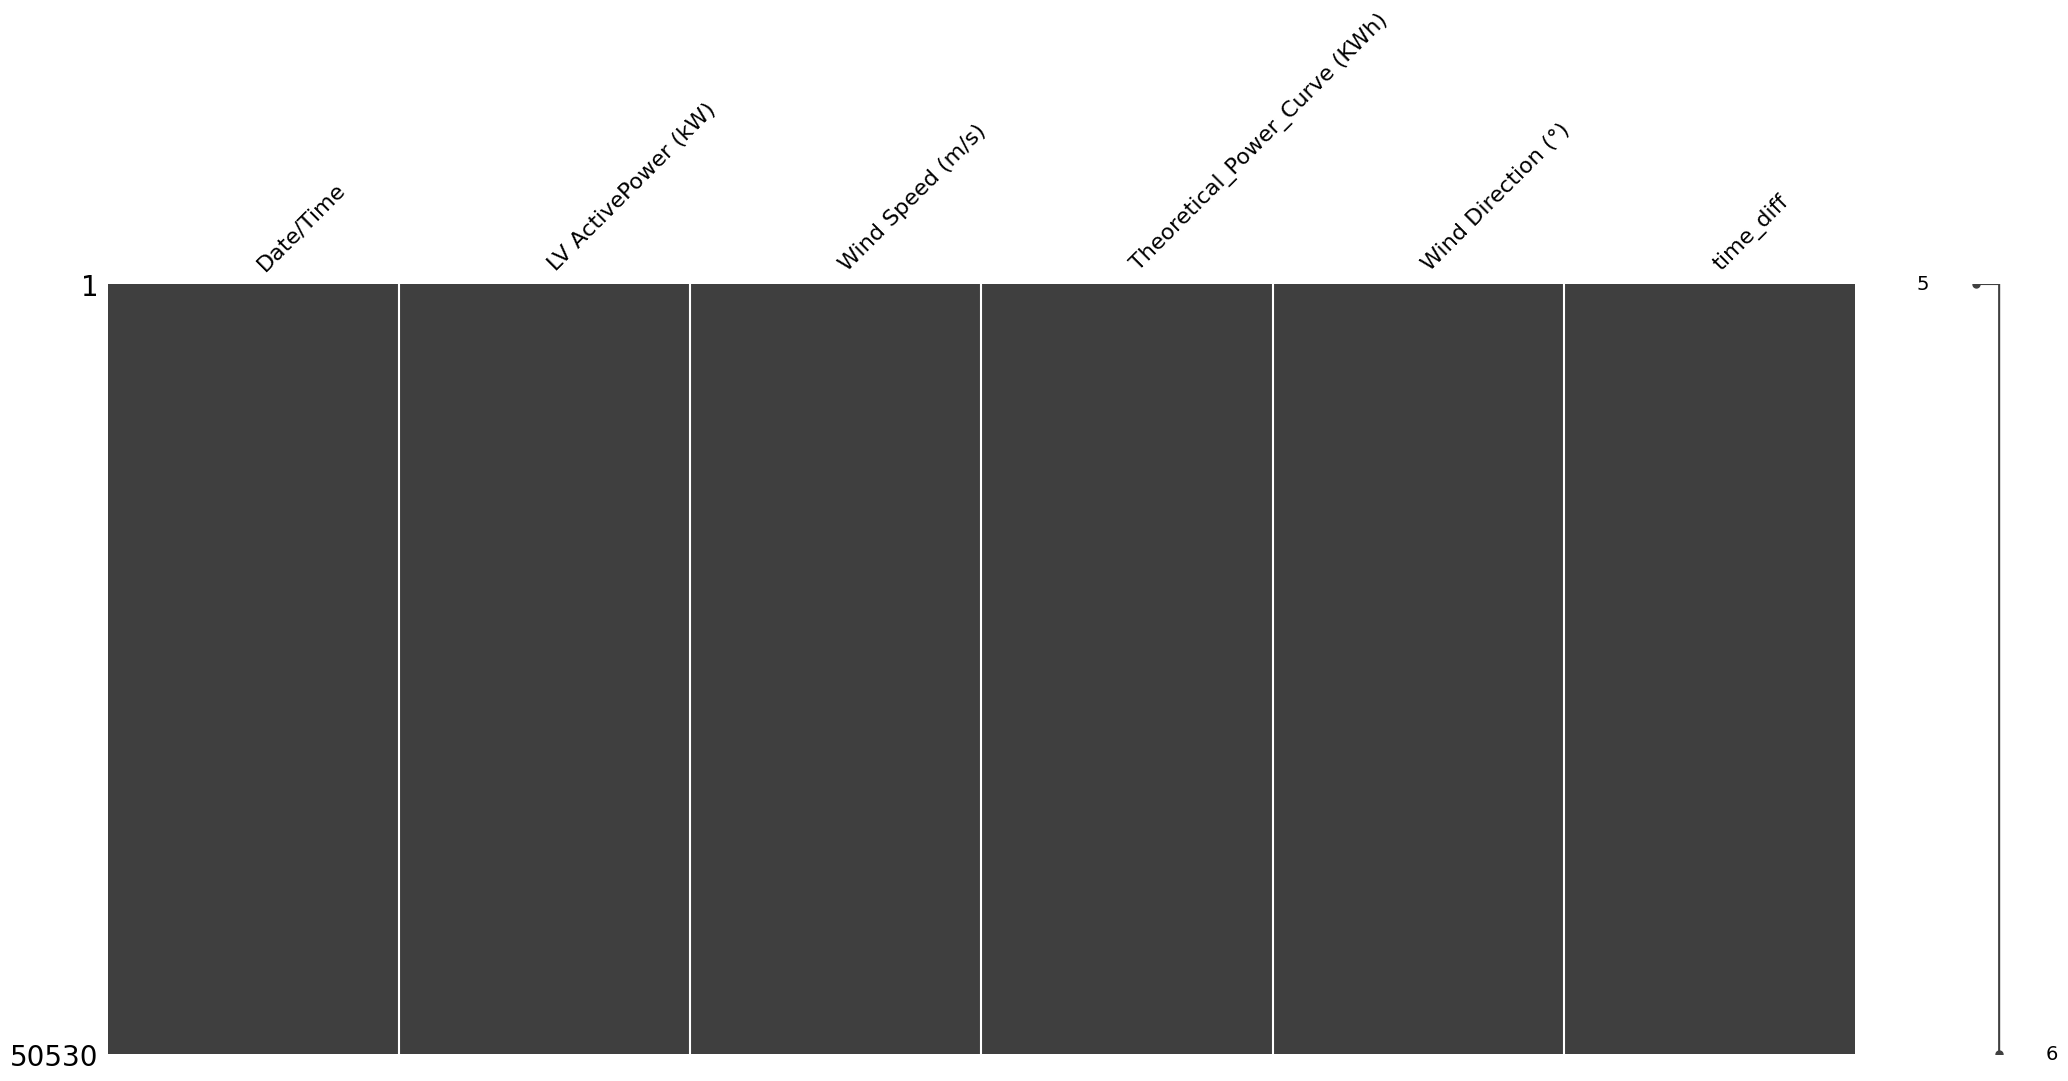

In [19]:
# 10. Missing Data Heatmap (optional)
import missingno as msno
msno.matrix(df)
plt.show()

In [20]:
# Get exact dataset size
print(f"Dataset size: {len(df)} rows, {len(df.columns)} columns")

# Get value ranges
print("\nValue Ranges:")
for col in df.select_dtypes(include=np.number).columns:
    print(f"{col}: {df[col].min():.2f} to {df[col].max():.2f}")

# Count exact missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for negative power (physical impossibility)
negative_power = (df['LV ActivePower (kW)'] < 0).sum()
print(f"\nNegative power values: {negative_power}")

# Get outlier counts
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(np.number).dropna()))
outliers_per_col = (z_scores > 3).sum(axis=0)
print("\nOutliers per column:")
print(outliers_per_col)

# Check data distribution
print("\nData distribution (skewness):")
print(df[['Wind Speed (m/s)', 'LV ActivePower (kW)']].skew())

# Get correlation values
print("\nCorrelation with target (Power):")
print(df.corr(numeric_only=True)['LV ActivePower (kW)'].sort_values(ascending=False))

Dataset size: 50530 rows, 6 columns

Value Ranges:
LV ActivePower (kW): -2.47 to 3618.73
Wind Speed (m/s): 0.00 to 25.21
Theoretical_Power_Curve (KWh): 0.00 to 3600.00
Wind Direction (°): 0.00 to 360.00
time_diff: 10.00 to 6260.00

Missing values:
Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
time_diff                        1
dtype: int64

Negative power values: 57

Outliers per column:
LV ActivePower (kW)                0
Wind Speed (m/s)                 228
Theoretical_Power_Curve (KWh)      0
Wind Direction (°)                 0
time_diff                         12
dtype: int64

Data distribution (skewness):
Wind Speed (m/s)       0.619507
LV ActivePower (kW)    0.600468
dtype: float64

Correlation with target (Power):
LV ActivePower (kW)              1.000000
Theoretical_Power_Curve (KWh)    0.949918
Wind Speed (m/s)                 0.912774
time_diff   